### IMPORT LIBRARY

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


### DATA SET YANG DIGUNAKAN

In [7]:
df = pd.read_csv('sleep_health_lifestyle_dataset.csv')
df =df.dropna()
df.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder
4,5,Male,67,Retired,9.1,9.5,19,4,Overweight,133/78,97,14945,Insomnia
8,9,Male,25,Manual Labor,11.9,7.2,27,8,Underweight,112/63,99,16397,Sleep Apnea
12,13,Male,54,Office Worker,4.1,6.8,113,9,Obese,137/90,70,15440,Sleep Apnea
18,19,Female,26,Manual Labor,9.2,6.4,93,9,Underweight,113/65,78,9957,Sleep Apnea
19,20,Male,27,Manual Labor,10.6,8.1,94,8,Normal,113/63,58,17796,Insomnia


### BOXPLOT UNTUK OUTLIER

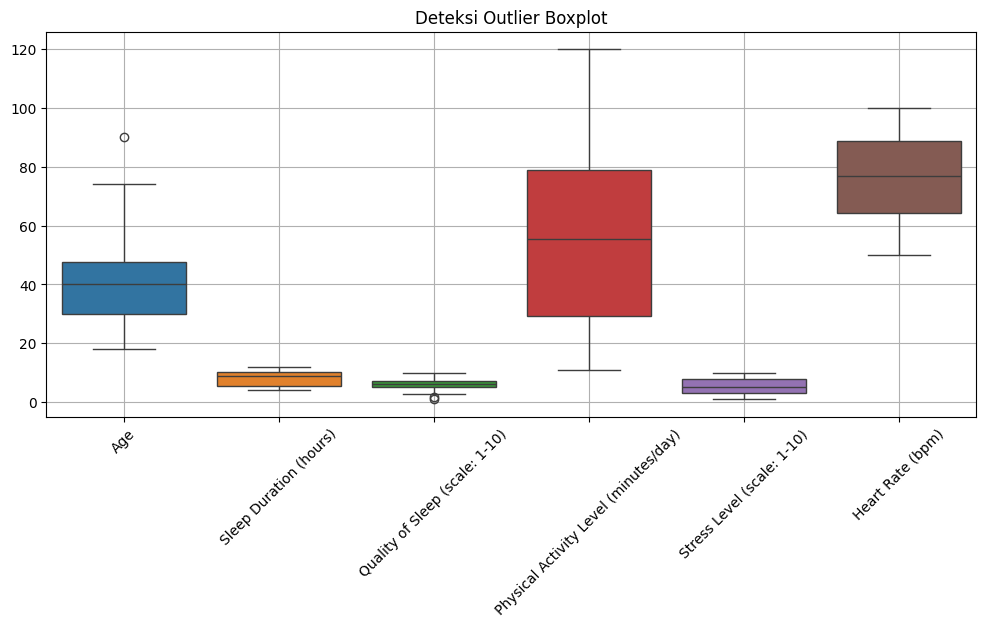

In [8]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df.drop(['Person ID','Daily Steps'], axis=1))
plt.title('Deteksi Outlier Boxplot')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### Standardisasi Data (z-score)

In [ ]:
X = df.select_dtypes(include=['int64', 'float64'])
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

### K-Distance Graph

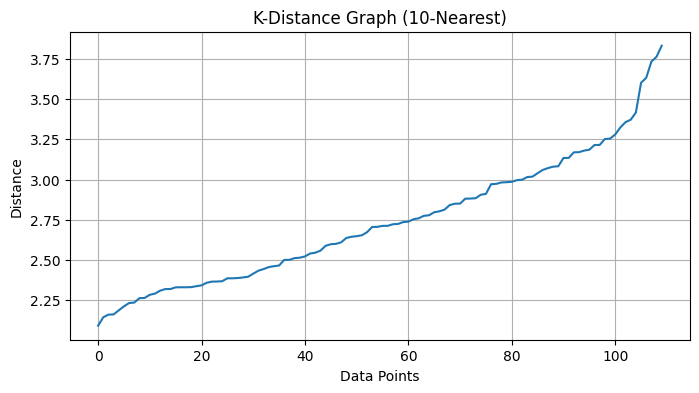

In [ ]:
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(X_Scaled)
distances, indices = neighbors_fit.kneighbors(X_Scaled)
distances = np.sort(distances[:, 9], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title("K-Distance Graph (10-Nearest)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

### DBSCAN Clustering

In [ ]:
dbscan = DBSCAN(eps=3.20, min_samples=20)
dbscan.fit(X_Scaled)
df['Cluster'] = dbscan.labels_

### Evaluasi Silhouette Score

In [ ]:
if len(set(dbscan.labels_)) > 1:
    silhouette_avg = silhouette_score(X_Scaled, dbscan.labels_)
    print(f'Silhouette Score: {silhouette_avg:.2f}')
else:
    print('Silhouette Score tidak dapat dihitung karena hanya ada satu cluster atau semua data adalah noise.')

Silhouette Score: 0.19


### Hasil Clustering

In [ ]:
print("\nJumlah Cluster:", df['Cluster'].nunique())
print(df.groupby('Cluster')['Gender'].apply(list))


Jumlah Cluster: 2
Cluster
-1                                         [Male, Male]
 0    [Male, Male, Male, Female, Male, Male, Female,...
Name: Gender, dtype: object


### PCA UNTUK VISUALISASI

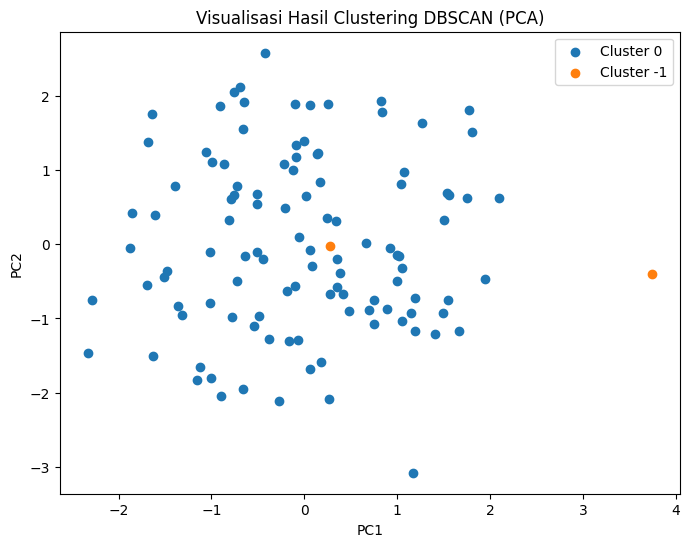

In [20]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

pca = PCA(n_components=2)
components = pca.fit_transform(X_Scaled)
df['PC1'] = components[:, -1]
df['PC2'] = components[:, 0]

plt.figure(figsize=(8, 6))
palette = plt.get_cmap('Set1', df['Cluster'].nunique())
for label in df['Cluster'].unique():
    plt.scatter(df[df['Cluster'] == label]['PC1'],
                df[df['Cluster'] == label]['PC2'],
                label=f'Cluster {label}')
plt.title("Visualisasi Hasil Clustering DBSCAN (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()